<a href="https://colab.research.google.com/github/awgimenes/Deep-Learning/blob/main/DEEP_LEARNING_TAREFA_TRILHA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING
Tarefa trilha 4 - 
Anderson Willians Gimenes - 10992120393

https://colab.research.google.com/drive/1BwV3zA4hYfGRgUZV5eLHl5HnWPecNO2f?usp=sharing

In [1]:
#importando as blibiotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
#@title Execute antes de seguir.
#@markdown Funções pré-definidas de report de classificação e plot da curva de aprendizado.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('\nConfusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
  print('\nClassification Report: \n\n', classification_report(y_test, y_pred))
  print('\nAccuracy Score: \n\n', accuracy_score(y_test, y_pred), '\n')
  return

def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  print('\n\nLearning Curve... \n\n')
  print('\n', history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, [history_df.columns[1], history_df.columns[3]]].plot()

  print(("\nBest Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df[history_df.columns[2]].min(), 
              history_df[history_df.columns[3]].max()))
  print('\n ')
  return

# print_results(y_test_one, y_pred_one)
# display_acc_hist(history)

In [3]:
#Adquirindo o dataset

ds = pd.read_csv('https://github.com/awgimenes/Deep-Learning/raw/main/student_mat_edit.csv', delimiter=';')

In [4]:
#Visualizando os dados

display(ds)

,sex (M=1/F=0),age,P_s101us (Presen1=1/0use=0),Mother_edu,Father_edu,guardian,schoolsup(Y=1/N=0),famsup(Y=1/N=0),paid(Y=1/N=0),activities(Y=1/N=0),nursery(Y=1/N=0),higher(Y=1/N=0),internet(Y=1/N=0),romantic(Y=1/N=0),famrel,freetime,goout,Dalc,Walc,health,G3,S_Type
0,0,18,0,4,4,mother,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,Bad
1,0,17,1,1,1,father,0,1,0,0,0,1,1,0,5,3,3,1,1,3,6,Bad
2,0,15,1,1,1,mother,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,Bad
3,0,15,1,4,2,mother,0,1,1,1,1,1,1,1,3,2,2,1,1,5,15,Good
4,0,16,1,3,3,father,0,1,1,0,1,1,0,0,4,3,2,1,2,5,10,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,0,2,2,other,0,1,1,0,1,1,0,0,5,5,4,4,5,4,9,Bad
391,1,17,1,3,1,mother,0,0,0,0,0,1,1,0,2,4,5,3,4,2,16,Good
392,1,21,1,1,1,other,0,0,0,0,0,1,0,0,5,5,3,3,3,3,7,Bad
393,1,18,1,3,2,mother,0,0,0,0,0,1,1,0,4,4,1,3,4,5,10,Bad


In [5]:
# Verificando nulos, quantidades e tipos de dados
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sex (M=1/F=0)                395 non-null    int64 
 1   age                          395 non-null    int64 
 2   P_s101us (Presen1=1/0use=0)  395 non-null    int64 
 3   Mother_edu                   395 non-null    int64 
 4   Father_edu                   395 non-null    int64 
 5   guardian                     395 non-null    object
 6   schoolsup(Y=1/N=0)           395 non-null    int64 
 7   famsup(Y=1/N=0)              395 non-null    int64 
 8   paid(Y=1/N=0)                395 non-null    int64 
 9   activities(Y=1/N=0)          395 non-null    int64 
 10  nursery(Y=1/N=0)             395 non-null    int64 
 11  higher(Y=1/N=0)              395 non-null    int64 
 12  internet(Y=1/N=0)            395 non-null    int64 
 13  romantic(Y=1/N=0)            395 no

In [6]:
#Conferindo quais são as minhas features (colunas)
print(ds.columns)

Index(['sex (M=1/F=0)', 'age', 'P_s101us (Presen1=1/0use=0)', 'Mother_edu',
       'Father_edu', 'guardian', 'schoolsup(Y=1/N=0)', 'famsup(Y=1/N=0)',
       'paid(Y=1/N=0)', 'activities(Y=1/N=0)', 'nursery(Y=1/N=0)',
       'higher(Y=1/N=0)', 'internet(Y=1/N=0)', 'romantic(Y=1/N=0)', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3', 'S_Type'],
      dtype='object')


In [7]:
#Discretizando os valores da coluna 'guardian'
ds2 = pd.get_dummies(ds,columns=['guardian'])

In [8]:
#Imprimindo o novo dataset ds2
ds2

,sex (M=1/F=0),age,P_s101us (Presen1=1/0use=0),Mother_edu,Father_edu,schoolsup(Y=1/N=0),famsup(Y=1/N=0),paid(Y=1/N=0),activities(Y=1/N=0),nursery(Y=1/N=0),higher(Y=1/N=0),internet(Y=1/N=0),romantic(Y=1/N=0),famrel,freetime,goout,Dalc,Walc,health,G3,S_Type,guardian_father,guardian_mother,guardian_other
0,0,18,0,4,4,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,Bad,0,1,0
1,0,17,1,1,1,0,1,0,0,0,1,1,0,5,3,3,1,1,3,6,Bad,1,0,0
2,0,15,1,1,1,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,Bad,0,1,0
3,0,15,1,4,2,0,1,1,1,1,1,1,1,3,2,2,1,1,5,15,Good,0,1,0
4,0,16,1,3,3,0,1,1,0,1,1,0,0,4,3,2,1,2,5,10,Bad,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,0,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,9,Bad,0,0,1
391,1,17,1,3,1,0,0,0,0,0,1,1,0,2,4,5,3,4,2,16,Good,0,1,0
392,1,21,1,1,1,0,0,0,0,0,1,0,0,5,5,3,3,3,3,7,Bad,0,0,1
393,1,18,1,3,2,0,0,0,0,0,1,1,0,4,4,1,3,4,5,10,Bad,0,1,0


In [9]:
#Conferindo o resultado
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sex (M=1/F=0)                395 non-null    int64 
 1   age                          395 non-null    int64 
 2   P_s101us (Presen1=1/0use=0)  395 non-null    int64 
 3   Mother_edu                   395 non-null    int64 
 4   Father_edu                   395 non-null    int64 
 5   schoolsup(Y=1/N=0)           395 non-null    int64 
 6   famsup(Y=1/N=0)              395 non-null    int64 
 7   paid(Y=1/N=0)                395 non-null    int64 
 8   activities(Y=1/N=0)          395 non-null    int64 
 9   nursery(Y=1/N=0)             395 non-null    int64 
 10  higher(Y=1/N=0)              395 non-null    int64 
 11  internet(Y=1/N=0)            395 non-null    int64 
 12  romantic(Y=1/N=0)            395 non-null    int64 
 13  famrel                       395 no

In [10]:
#percebemos que a base de dados não é equilibrada, mas está proximo disto, não vou equilibrar para poder ver qual resultado vamos obter
ds2.S_Type.value_counts()

Good    209
Bad     186
Name: S_Type, dtype: int64

In [11]:
X = ds2.drop(columns=['S_Type'])
y = ds2[['S_Type']]
colunas_X = X.columns.to_list()

In [12]:
# Encode, para classificação

y = y.replace({'Bad':0,'Good':1})

In [13]:
# Scale normalização dos dados

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X),columns= colunas_X)


In [14]:
#Visualizando o resultado

print('\nEntradas para o Treinamento, X...\n')
display(X.head())
print('\nSaídas para o Treinamento, y....\n')
display(y.head())


Entradas para o Treinamento, X...



,sex (M=1/F=0),age,P_s101us (Presen1=1/0use=0),Mother_edu,Father_edu,schoolsup(Y=1/N=0),famsup(Y=1/N=0),paid(Y=1/N=0),activities(Y=1/N=0),nursery(Y=1/N=0),higher(Y=1/N=0),internet(Y=1/N=0),romantic(Y=1/N=0),famrel,freetime,goout,Dalc,Walc,health,G3,guardian_father,guardian_mother,guardian_other
0,0.0,0.428571,0.0,1.00,1.00,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.30,0.0,1.0,0.0
1,0.0,0.285714,1.0,0.25,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.30,1.0,0.0,0.0
2,0.0,0.000000,1.0,0.25,0.25,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.50,0.0,1.0,0.0
3,0.0,0.000000,1.0,1.00,0.50,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.75,0.0,1.0,0.0
4,0.0,0.142857,1.0,0.75,0.75,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.50,1.0,0.0,0.0



Saídas para o Treinamento, y....



,S_Type
0,0
1,0
2,0
3,1
4,0


In [15]:
# Conjuntos de Treinamento e Teste
#-------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=122)

In [16]:
# Define o Modelo
#-------------------------------------------------------------------------------
#quantidade de entrada
qtd_entr=X_train.shape[1]
#quantidade de saidas
qtd_saida=y_train.shape[1]

model = keras.Sequential([
          layers.Dense(qtd_entr, activation='elu', input_shape=[qtd_entr]),# Entrada
          layers.Dense(128, activation='elu'), # hidden
          layers.Dense(128, activation='elu'), # hidden
          layers.Dense(16, activation='elu'), # hidden
          layers.Dense(qtd_saida, activation='sigmoid')# Saída
        ]) 
display(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 128)               3072      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 22,217
Trainable params: 22,217
Non-trainable params: 0
_________________________________________________________________


None

In [17]:
# Compila o Modelo
#-------------------------------------------------------------------------------
model.compile(loss='binary_crossentropy',  # Multiclass loss
              optimizer='adam', 
              metrics=['binary_accuracy'])


Confusion Matrix: 

 [[49 11]
 [ 7 52]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.82      0.84        60
           1       0.83      0.88      0.85        59

    accuracy                           0.85       119
   macro avg       0.85      0.85      0.85       119
weighted avg       0.85      0.85      0.85       119


Accuracy Score: 

 0.8487394957983193 



Learning Curve... 



        loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.710380         0.580311  0.751347             0.421687
1  0.684261         0.528497  0.679530             0.614458
2  0.611178         0.678756  0.678410             0.626506
3  0.587730         0.694301  0.669542             0.626506
4  0.531199         0.704663  0.709540             0.578313

Best Validation Loss: 0.4918
Best Validation Accuracy: 0.7952

 


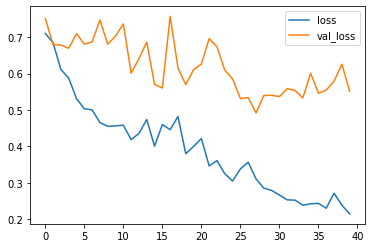

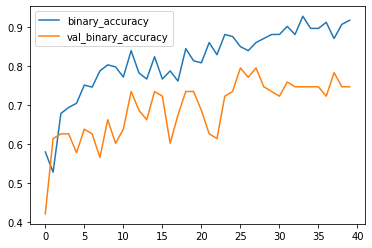

In [18]:
# Treina o Modelo
#-------------------------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=40,
    verbose=0,  
)

# Avalia o Modelo
#-------------------------------------------------------------------------------
y_pred = model.predict(X_test)  > 0.5

print_results(y_test, y_pred)
display_acc_hist(history)

Mesmo com a base um pouco desbalanceada, conseguimos um bom resultado com o modelo empregado, obtendo uma acurácia de 0,85, arredondando. 

In [19]:
#Visualizando o reultado da predição
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [